# Purpose: Coloring Segmented Images According to Shape Mode

Date Created: 1-26-2021

Date Updated: 11-15-2021: Updated to change from the ferret paper to the Microglia/BeV paper

Author: Hawley Helmbrecht

**Colors:** 

shape mode 1: Blue

shape mode 2: Orange

shape mode 3: Green

shape mode 4: Red

shape mode 5: Purple

*Step 1: Import Necessary Packages*

In [25]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from PIL import Image
import os

*Step 2: User input variables*

In [4]:
im_file_path = '/Users/hhelmbre/Desktop/Phuong_Bev/vampire/images/test/4_hr_exposure_0_hr_application_pngs/bev_treatment/EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-1_li_thresh_quad2xy47c1.png'
csv_file_path = '/Users/hhelmbre/Desktop/Phuong_Bev/visualization/shape_mode_vs_feature_all.csv'

*Step 3: Reading in the Image and CSV with Labels*

In [5]:
img = mpimg.imread(im_file_path)
csv_df = pd.read_csv(csv_file_path)

In [6]:
csv_df

,Filename,ImageID,ObjectID,X,Y,Area,Perimeter,Major Axis,Minor Axis,Circularity,Aspect Ratio,Shape mode,Distance from cluster center
0,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-1-3_li_...,1,1,60,20,557,155.024387,40.190071,24.569755,0.291249,1.635754,1,4.41
1,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-1-3_li_...,1,4,82,86,344,101.982756,30.974198,16.624502,0.415638,1.863165,1,3.84
2,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-1-4_li_...,2,3,147,109,2008,321.190909,64.388905,48.168365,0.244595,1.336747,1,6.38
3,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-1-4_li_...,3,11,196,166,226,122.018290,25.716999,20.054540,0.190752,1.282353,1,8.62
4,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-1-5_li_...,4,6,36,109,499,165.095454,35.132996,23.984245,0.230060,1.464836,1,4.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,EV_MICROGLIA_STUDY_OGD_CONTROL_1-2-2-4_li_thre...,9,2,154,184,1052,295.220346,63.403063,29.525866,0.151682,2.147374,5,3.48
2195,EV_MICROGLIA_STUDY_OGD_CONTROL_1-2-3-2_li_thre...,11,9,128,136,98,46.455844,15.218403,8.953230,0.570631,1.699767,5,2.57
2196,EV_MICROGLIA_STUDY_OGD_CONTROL_1-2-3-5_li_thre...,13,2,145,38,385,92.083261,29.864223,17.469986,0.570570,1.709459,5,2.09
2197,EV_MICROGLIA_STUDY_OGD_CONTROL_1-2-3-5_li_thre...,13,7,65,93,114,60.905592,18.802809,9.970999,0.386189,1.885750,5,4.32


*Step 4: Getting the file name*

In [7]:
im_file_name_split = im_file_path.split('/')
length = len(im_file_name_split)
file_name = im_file_name_split[length-1]
file_name

'EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-1_li_thresh_quad2xy47c1.png'

*Step 5: Creating a mask for labeling*

In [8]:
mask_b = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_o = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_g = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_r = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_p = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)

In [15]:
start_pt = (14,111)
cv2.floodFill(img, mask_o, start_pt, (0,0,255), flags=4)

(55316, array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), (0, 0, 256, 256))

In [13]:
mask_o = mask_o[1:-1, 1:-1]

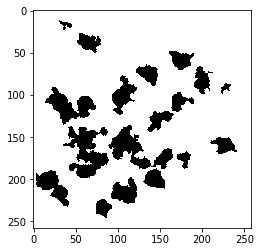

In [16]:
plt.imshow(mask_o, cmap='gray')

*Step X: Automating the Process*

*Step 1: Import need_to_label_list*

In [32]:
need_to_label_list_file_path = '/Users/hhelmbre/Desktop/Phuong_Bev/visualization/images_to_color.csv'
need_to_label_list = pd.read_csv(need_to_label_list_file_path)
need_to_label_list

,image_file_path,Image_label_path
0,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
1,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
2,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
3,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
4,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
5,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
6,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
7,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
8,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...
9,/Users/hhelmbre/Desktop/Phuong_Bev/vampire/ima...,/Users/hhelmbre/Desktop/Phuong_Bev/visualizati...


In [37]:
need_to_label_list2 = []
j = 0
for file_paths in range(0,need_to_label_list.shape[0]):
    arr = os.listdir(need_to_label_list['image_file_path'][j])
    image_list = np.asarray(arr)
    image_list = [x for x in image_list if ".png" in x]
    for images in image_list:
        file_name = str(need_to_label_list['image_file_path'][j] + '/' + images)
        need_to_label_list2.append(file_name)
        
    j += 1
    

*Add in a step here to visualize the shape mode labels with the colors I chose*

In [51]:
def c(x):
   col = plt.cm.twilight(x)
   fig, ax = plt.subplots(figsize=(1,1))
   fig.set_facecolor(col)
   ax.axis("off")
   plt.show()

0.0


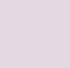

0.05263157894736842


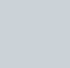

0.10526315789473684


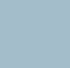

0.15789473684210525


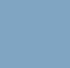

0.21052631578947367


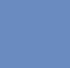

0.2631578947368421


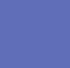

0.3157894736842105


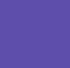

0.3684210526315789


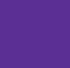

0.42105263157894735


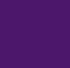

0.47368421052631576


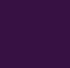

0.5263157894736842


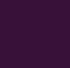

0.5789473684210527


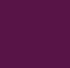

0.631578947368421


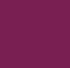

0.6842105263157894


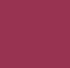

0.7368421052631579


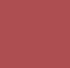

0.7894736842105263


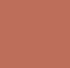

0.8421052631578947


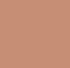

0.894736842105263


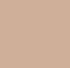

0.9473684210526315


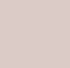

1.0


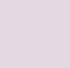

In [52]:
color_list = np.linspace(0,1,20)
for options in color_list:
    print(options)
    c(options)

*The code to actually recolor the images*

In [63]:
label_save_file_path = '/Users/hhelmbre/Desktop/Phuong_Bev/vampire/color_coded'

EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-6_li_thresh_quad3xy70c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-2_li_thresh_quad1xy54c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-7_li_thresh_quad2xy64c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-2_li_thresh_quad2xy41c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-3-6_li_thresh_quad1xy53c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-2_li_thresh_quad3xy22c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-3-9_li_thresh_quad1xy16c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-5_li_thresh_quad1xy73c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-3-2_li_thresh_quad4xy31c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-3-6_li_thresh_quad3xy28c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-3-1_li_thresh_quad4xy51c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-3-1_li_thresh_quad1xy66c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-1-1_li_thresh_quad2xy47c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-2-2_li_thresh_quad4xy137c1.png
EV_MICROGLIA_STUDY_4HR_EXPOSURE_1-2-3-5_li_thresh_quad4xy82c1.png
EV_MICROG

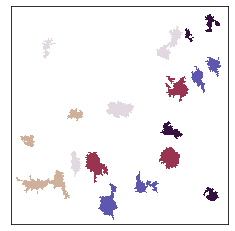

In [62]:
k = 0
cmap = plt.get_cmap('twilight')
cmap.set_bad(color = 'white')
for images in need_to_label_list2:
    
    #Reading in the image and its labels
    im_file_path = images
    img = mpimg.imread(im_file_path)
    csv_df = pd.read_csv('/Users/hhelmbre/Desktop/Phuong_Bev/visualization/shape_mode_vs_feature_all.csv')
    
    #Getting the file path from the file name
    im_file_name_split = im_file_path.split('/')
    length = len(im_file_name_split)
    file_name = im_file_name_split[length-1]
    print(file_name)
    
    mask = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
    
    csv_df = csv_df[csv_df.Filename == file_name]
    csv_df = csv_df.reset_index(drop=True)
    
    for shapes in range(len(csv_df)):
        shape_mode = (csv_df['Shape mode'][shapes]).astype(int)
        start_pt = (csv_df['X'][shapes], csv_df['Y'][shapes])
        area =csv_df['Area'][shapes]
        
        if img[csv_df['Y'][shapes]][csv_df['X'][shapes]]== 1:
            if shape_mode==1: #0.5
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 128

            elif shape_mode==2: #0.047
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 12
            elif shape_mode==3: #0.7
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 179

            elif shape_mode==4: #0.33
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 85

            elif shape_mode==5: #0.9
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 230

            if shapes == len(csv_df)-1:
                mask = mask[1:-1, 1:-1]
                mask[0][0] = 255
                
                mask = mask.astype('float')
                mask[mask==0] = np.nan
            
                plt.imshow(mask,cmap='twilight')
                plt.tick_params(
                    axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False)
                plt.yticks([])
                plt.savefig(str(label_save_file_path + str(k) + file_name), bbox_inches = 'tight',
    pad_inches = 0)

                #img_to_save = Image.fromarray(mask)
                #img_to_save.save(str(label_save_file_path + str(k) + file_name))

    
    k += 1

*Step 3: Environment Specs*

In [67]:
%load_ext watermark

%watermark -v -m -p numpy,pandas,scipy,skimage,matplotlib,cv2,PIL,wget

%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.8.0

numpy     : 1.17.2
pandas    : 0.25.1
scipy     : 1.3.1
skimage   : 0.17.2
matplotlib: 3.1.1
cv2       : 4.2.0
PIL       : 7.2.0
wget      : 3.2

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Last updated: Mon Nov 15 2021 15:29:44PST

